# ***Performing Analysis of Meteorological Data***

### ***Hypothesis H0is "Has the Apparent temperature and humiditycompared monthly across 10 years of the data indicate an increase due to Global warming"***

#### ***import require libraries***

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [115]:
df=pd.read_csv('weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


### ***Remove unrelevant feature***

In [116]:
df=df.drop(['Precip Type','Temperature (C)','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)','Daily Summary'],axis=1)

In [117]:
df.head()

,Formatted Date,Summary,Apparent Temperature (C),Humidity
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,7.388889,0.89
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,7.227778,0.86
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,9.377778,0.89
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,5.944444,0.83
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,6.977778,0.83


In [118]:
df.rename({'Apparent Temperature (C)': 'Apparent Temperature'}, axis=1, inplace=True)

### ***Changing the format into date time and resampling***

In [119]:
df['Formatted Date']=pd.to_datetime(df['Formatted Date'],utc=True)
df= df.set_index('Formatted Date')
df1= df[['Apparent Temperature', 'Humidity']].resample('MS').mean()

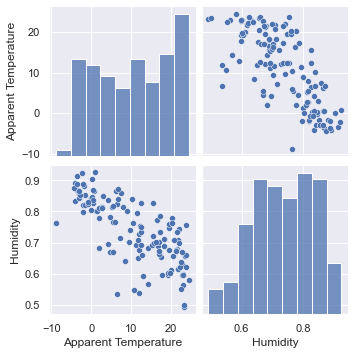

In [120]:
sns.set(rc={'figure.figsize':(10,8)})
sns.pairplot(df1)

C:\Users\milin\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\milin\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\milin\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\milin\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\milin\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\milin\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

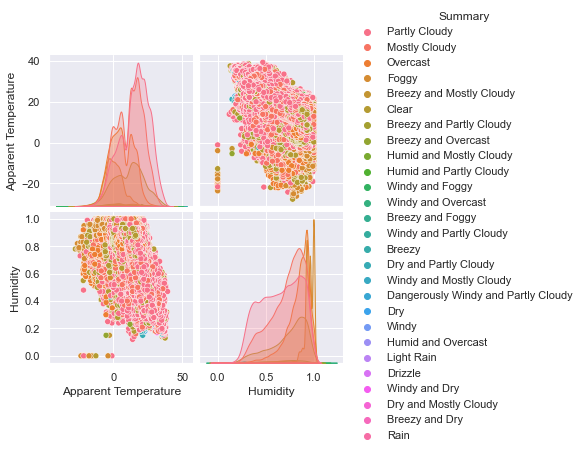

In [121]:
sns.pairplot(df,hue='Summary')
plt.show()

array([[<AxesSubplot:title={'center':'Apparent Temperature'}>,
        <AxesSubplot:title={'center':'Humidity'}>]], dtype=object)

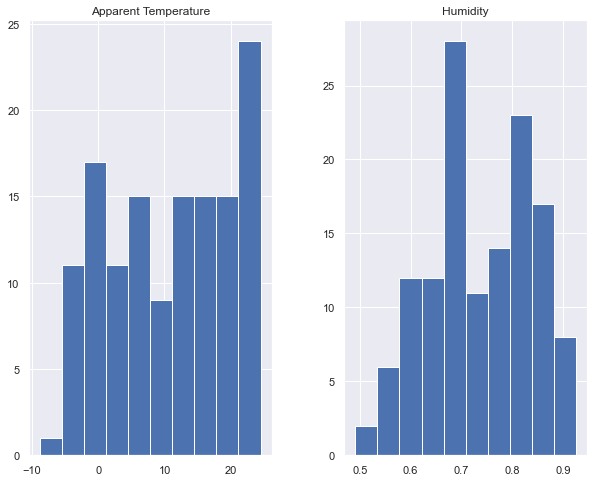

In [122]:
df1.hist()

<AxesSubplot:xlabel='Humidity', ylabel='Apparent Temperature'>

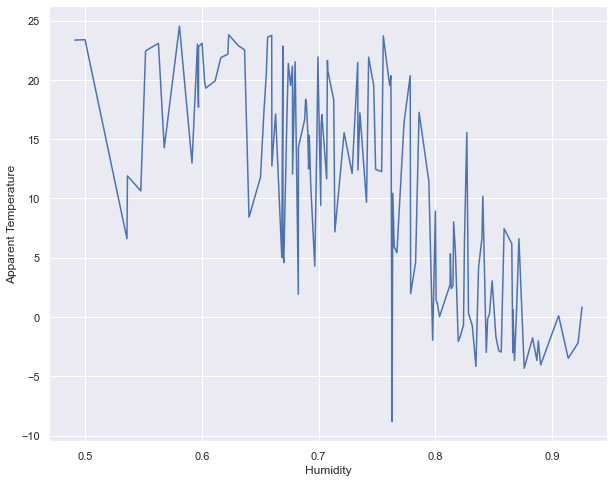

In [123]:
sns.lineplot(x ='Humidity',y='Apparent Temperature', data=df1)

### ***Variation in Tempreature and Humidity throughout 2006 to 2016***

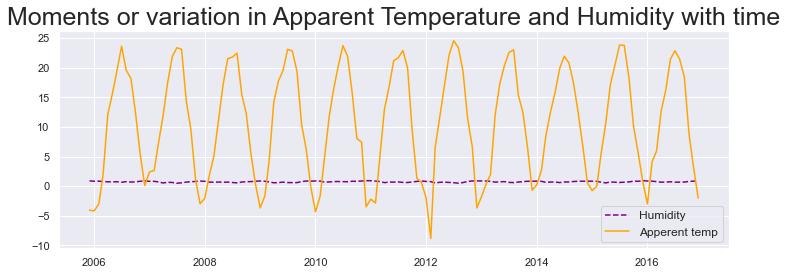

In [124]:
plt.figure(figsize=(12,4));
plt.plot(df1['Humidity'], label = 'Humidity', color = 'purple',linestyle='dashed');
plt.plot(df1['Apparent Temperature'] , label = 'Apperent temp',color='orange');
plt.title("Moments or variation in Apparent Temperature and Humidity with time",fontsize=25);
plt.legend(loc = 0,fontsize = 12);



### ***Variation of Temperature and Humidity for the month April***

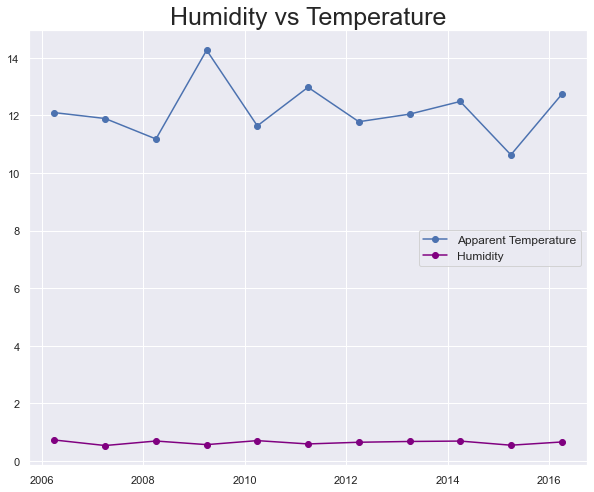

In [125]:
april = df1[df1.index.month==4]
plt.plot(april.loc['2006-04-01' : '2016-04-01', 'Apparent Temperature'],marker='o',linestyle='-',label = 'Apparent Temperature');
plt.plot(april.loc['2006-04-01' : '2016-04-01', 'Humidity'],marker='o',linestyle='-',label = 'Humidity',color = 'purple');
plt.title("Humidity vs Temperature",fontsize = 25)
plt.legend(loc = 'center right',fontsize = 12);

## ***Observations:***

### ***- Global warming has a great affect on the Weather Condition of Finland ***
### ***- Humidity remain same throught the year or time there is extreme change in humidity***
### ***- In 2009 there was extreame increase in Apparent Temperature***
### ***- Apparent Temperature did'nt had any drastic changes but did had few spikes in it***

## ***Thank You!!!***